# Create Project

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [2]:
#load data
url ='london_weather_MODIFIED - london_weather_MODIFIED.csv'
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [3]:
def plot_dates(ts,figsize=(12,4),xtick_fontsize='large', xtick_fontweight='bold',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
    
    ## creating our tick locators and formatters
    ## for minor month ticks
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontsize=xtick_fontsize, 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax
plot_dates(ts);

NameError: name 'ts' is not defined

# Prepare the data

In [4]:
# convert to date time
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['datetime']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: datetime, Length: 15341, dtype: datetime64[ns]

In [5]:
#set date time as index
df = df.set_index('datetime')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,,
1979-01-01,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [6]:
df.index


DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

## Filter the data
- Keep only data from the year 2000 or later.
- Keep only the following features:
 - precipitation
 - mean_temp
 - min_temp
 - max_temp
 - snow_depth

In [7]:
# Filter data
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Missing values

In [8]:
# look at missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [9]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [10]:
# look at missing values
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [11]:
#look at snow
df['snow_depth'].describe()

count    5919.000000
mean        0.023146
std         0.306467
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: snow_depth, dtype: float64

In [12]:
# filling snow with 0
#df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(method='bfill')

In [13]:
#look at precipitation
df['precipitation'].describe()

count    7281.000000
mean        1.723376
std         3.675610
min         0.000000
25%         0.000000
50%         0.000000
75%         1.800000
max        51.600000
Name: precipitation, dtype: float64

In [14]:
#fix precipation
df['precipitation'] = df['precipitation'].interpolate()


In [15]:
# look at missing values
df.isna().sum()

precipitation      0
mean_temp          0
min_temp           0
max_temp           0
snow_depth       366
dtype: int64

In [16]:
# look at snow depth again
df['snow_depth'].describe()

count    7305.000000
mean        0.018754
std         0.276010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.000000
Name: snow_depth, dtype: float64

In [17]:
#fill with 0
df['snow_depth'] = df['snow_depth'].fillna(0)

In [18]:
# look at missing values
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Question 1
- What month had the most precipitation  between 2000 and 2010?

- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- "Visualization Requirements" 
 - Determine the date and value for the most precipitation (the max precipitation).
 - Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
 - Make sure to add a legend so that your label is visible.

In [19]:
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


<AxesSubplot: xlabel='datetime'>

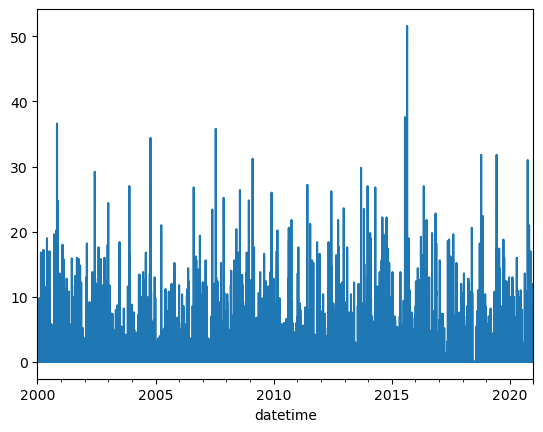

In [20]:
ts = df['precipitation'].copy()
ts.plot()

In [21]:
ts.index


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=7671, freq=None)

In [23]:
# resample month
ts_MS_res = ts.resample("MS").mean()
ts_MS_res.name = 'Resampled'
ts_MS_res.head()



datetime
2000-01-01    0.467742
2000-02-01    2.234483
2000-03-01    0.448387
2000-04-01    2.750000
2000-05-01    2.516129
Freq: MS, Name: Resampled, dtype: float64

In [24]:
ts_MS_res.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 252 entries, 2000-01-01 to 2020-12-01
Freq: MS
Series name: Resampled
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [28]:
# find the month with the most precipiation for original dataframe
max_date = df['precipitation'].idxmax()
max_date

Timestamp('2015-08-26 00:00:00')

In [29]:
# max precipitation date for  a day
max_date_q1 = ts_MS_res.idxmax()
max_date_q1

Timestamp('2014-01-01 00:00:00', freq='MS')

In [87]:
# get the precipititaion for a day
max_prec = ts_MS_res.loc['2014-01-01'].round(2)
max_prec

4.95

In [22]:
agg_specs = {"mean_temp":"mean","min_temp":"min",'max_temp':'max',
             'precipitation':'sum', 'snow_depth':'sum'}

In [23]:
#example code for slice out data for a month
weather_m = ts.resample("m").agg(agg_specs)
weather_m = weather_m.loc['2000':'2010']
weather_m

,mean_temp,min_temp,max_temp,precipitation,snow_depth
datetime,,,,,
2000-01-31,0.467742,0.0,6.0,14.5,14.5
2000-02-29,2.234483,0.0,16.8,64.8,64.8
2000-03-31,0.448387,0.0,7.2,13.9,13.9
2000-04-30,2.750000,0.0,17.2,82.5,82.5
2000-05-31,2.516129,0.0,19.0,78.0,78.0
...,...,...,...,...,...
2010-08-31,2.980645,0.0,20.6,92.4,92.4
2010-09-30,1.486667,0.0,9.8,44.6,44.6
2010-10-31,2.035484,0.0,21.8,63.1,63.1


In [24]:
date_max = weather_m['precipitation'].idxmax()
max_precip = weather_m['precipitation'].max()

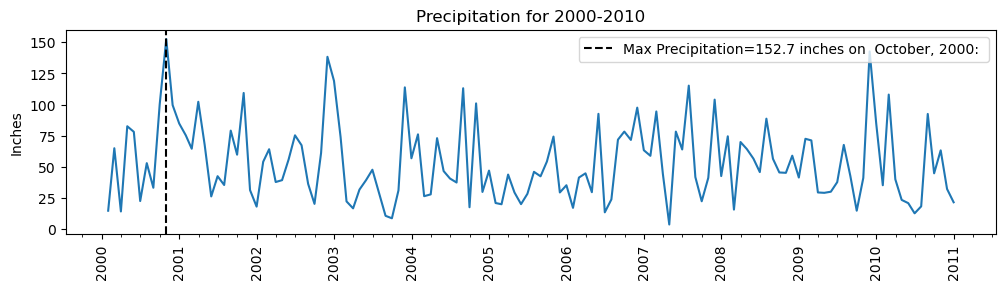

In [25]:
## Visualization WITH tick formatters (MUST NOT USE PANDAS)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(weather_m['precipitation'])
ax.set(title="Precipitation for 2000-2010", ylabel='Inches')


# customize major ticks 
major_loc =  mdates.YearLocator()
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# # customize maxor ticks
maxor_loc =  mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(maxor_loc)



## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',ha='center',rotation=90)


## Annotate max
date_max = weather_m['precipitation'].idxmax()
max_precip = weather_m['precipitation'].max()

label_txt = f"Max Precipitation={max_precip} inches on  {date_max.strftime('%B, %Y')}: "
ax.axvline(date_max,color='k',ls='--', label= label_txt)
ax.legend()

# Question 2: 
#### Which year between 2000-2020 had the coolest average temperature?
- Resample the data as Yearly frequency.
- Find the date and corresponding value for the max mean temp.
- Plot the feature and time period that corresponds to the question.

#### Visualization Requirements
- Determine the date and value for the lowest mean temp.

- Add a vertical line at this date with a label that says the date (using date format: "2000") and the max precipitation value.
-  what was the temperature?

 - Create a wide figure (e.g. figsize=(12,3))
 - With a title of "Average Temperature"
  - With a ylabel of "Degrees"
 - Customize the major xaxis ticks to:
    - Have major xaxis ticks every 5 years.
    - Use 4-digit years for the labels
    - Have the major ticks' labels rotated 90 degrees.
  - Customize the minor xaxis ticks to:
    - Have minor xaxis ticks every 1 year
    - Do not label the minor ticks.

In [57]:
agg_specs = {"mean_temp":"mean","min_temp":"min",'max_temp':'max',
             'precipitation':'sum', 'snow_depth':'sum'}

In [58]:
# create weather variable and resample for year
#example code for slice out data for a month
weather_y = ts.resample("Y").agg(agg_specs)
weather_y = weather_m.loc['2000':'2020']
weather_y

,mean_temp,min_temp,max_temp,precipitation,snow_depth
datetime,,,,,
2000-01-31,0.467742,0.0,6.0,14.5,14.5
2000-02-29,2.234483,0.0,16.8,64.8,64.8
2000-03-31,0.448387,0.0,7.2,13.9,13.9
2000-04-30,2.750000,0.0,17.2,82.5,82.5
2000-05-31,2.516129,0.0,19.0,78.0,78.0
...,...,...,...,...,...
2010-08-31,2.980645,0.0,20.6,92.4,92.4
2010-09-30,1.486667,0.0,9.8,44.6,44.6
2010-10-31,2.035484,0.0,21.8,63.1,63.1


In [59]:
y_min = weather_y['min_temp'].idxmin()
min_temp = weather_y['min_temp'].min()

In [60]:
print(y_min)

2000-01-31 00:00:00


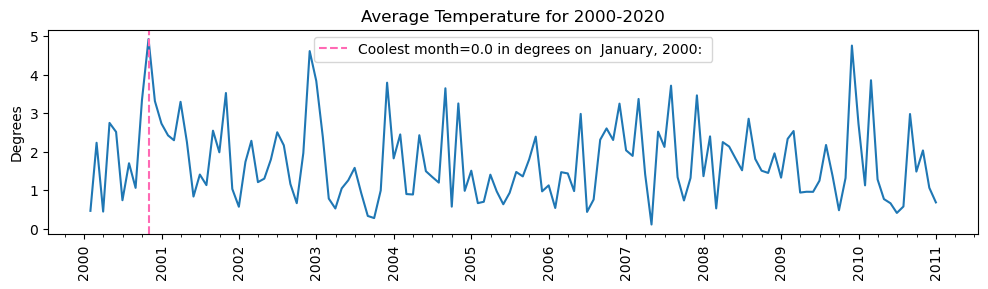

In [66]:
## Visualization WITH tick formatters (MUST NOT USE PANDAS)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(weather_y['mean_temp'])
ax.set(title="Average Temperature for 2000-2020", ylabel='Degrees')


# customize major ticks 
major_loc =  mdates.YearLocator()
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# # customize maxor ticks
maxor_loc =  mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(maxor_loc)



## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',ha='center',rotation=90)

# Annotate min
date_min = weather_y['min_temp'].idxmin()
min_temp = weather_y['min_temp'].min()

label_txt = f"Coolest month={min_temp} in degrees on  {date_min.strftime('%B, %Y')}: "

ax.axvline(date_max,color='hotpink',ls='--', label= label_txt)
ax.legend()